# Summary
# The goal
# Clean data
# Build the machine learning regressor to predict the house price
# Plan
# Key finding
# Future work

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def get_info(df, print_null):
    df_shape = df.shape
    print ("\nThe dataframe has %s data and %s features" %(df_shape[0], df_shape[1]))
    #
    features_obj = list(df.select_dtypes(include=['object']).columns)
    print ("\nThe number of object features: %s" %(len(features_obj)))
    for feature in features_obj:
        if (print_null):
            num_null = df[feature].isnull().sum()
            if (num_null > 0):
                print ("%50s has %8d null values (%7.2f%%)" %(feature, num_null, num_null/df_shape[0]*100))
    #
    features_num = list(df.select_dtypes(exclude=['object']).columns)
    print ("\nThe number of numeric features: %s" %(len(features_num)))
    for feature in features_num:
        if (print_null):
            num_null = df[feature].isnull().sum()
            if (num_null > 0):
                print ("%50s has %8d null values (%7.2f%%)" %(feature, num_null, num_null/df_shape[0]*100))

In [3]:
dataset = pd.read_csv('train.csv')
get_info(dataset, print_null= True)


The dataframe has 1460 data and 81 features

The number of object features: 43
                                             Alley has     1369 null values (  93.77%)
                                        MasVnrType has        8 null values (   0.55%)
                                          BsmtQual has       37 null values (   2.53%)
                                          BsmtCond has       37 null values (   2.53%)
                                      BsmtExposure has       38 null values (   2.60%)
                                      BsmtFinType1 has       37 null values (   2.53%)
                                      BsmtFinType2 has       38 null values (   2.60%)
                                        Electrical has        1 null values (   0.07%)
                                       FireplaceQu has      690 null values (  47.26%)
                                        GarageType has       81 null values (   5.55%)
                                      GarageFinish

In [4]:
# Droping ID
feature = "Id"
dataset.drop(labels=feature, axis='columns', inplace=True)

# Check for duplicated data
dataset[dataset.duplicated(keep=False)].index

Int64Index([], dtype='int64')

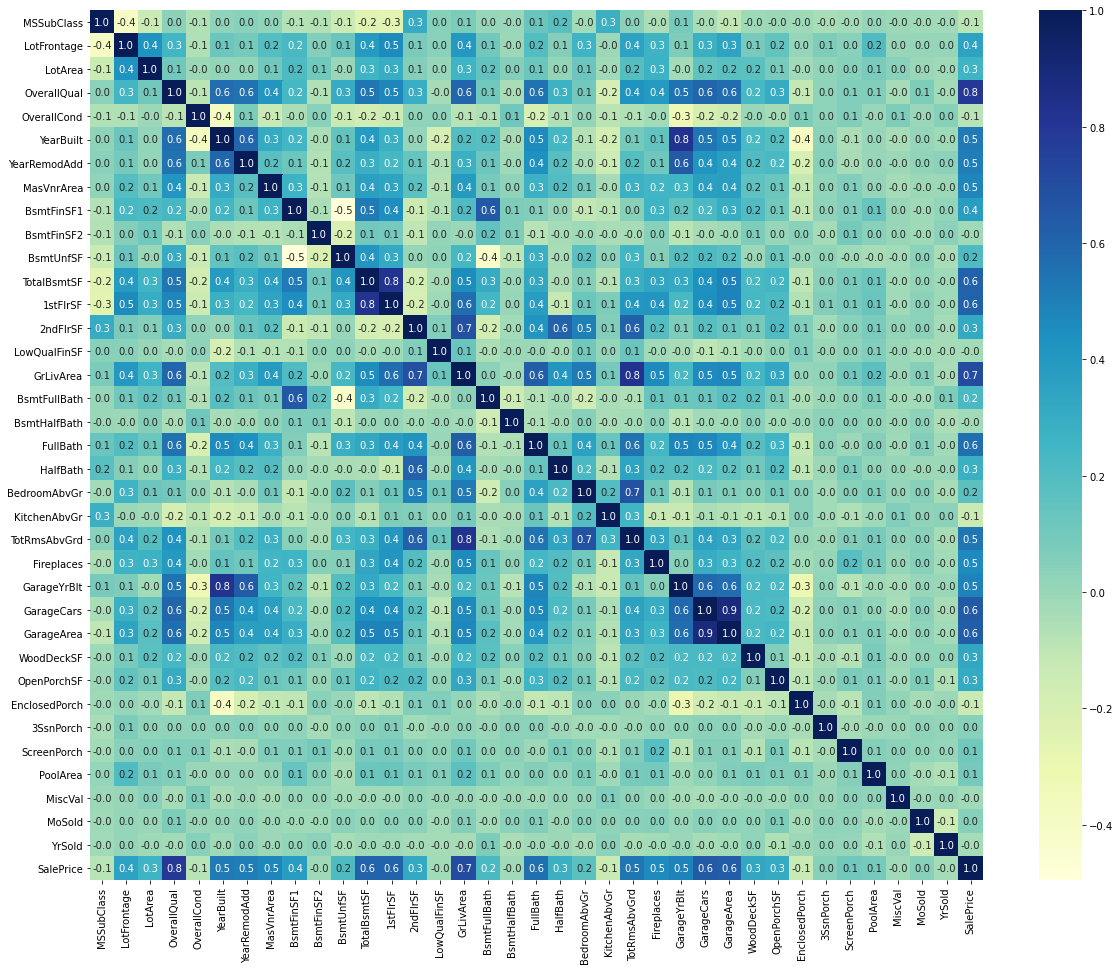

In [5]:
col_num = list(dataset.select_dtypes(include=['float64','int64']).columns)
corr = dataset[col_num].corr()
plt.figure(figsize = (20,16))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap="YlGnBu", annot=True, fmt=".1f")
plt.show()

In [6]:
# Check the linear dependence between feature1 and feature2
def plot_corr(df, feature1, feature2):
    plt.plot(df[feature1], df[feature2],'.')
    plt.xlabel(feature1, fontsize=12)
    plt.ylabel(feature2, fontsize=12)
    plt.xticks(rotation=0)
#
def plot_multiple(df, select):
    nselect = len(select)
    nplot = (nselect-1)
    nplot_col = 4
    nplot_row = nplot/nplot_col+1
    #print (nplot_col, nplot_row)
    nsize = 4
    plt.figure(figsize = (nsize*nplot_col,nsize*nplot_row))
    count = 1
    var2 = select[-1]
    for ind1 in range(len(select)-1):
        plt.subplot(nplot_row, nplot_col, count)
        count += 1
        var1 = select[ind1]
        plot_corr(df, var1, var2)

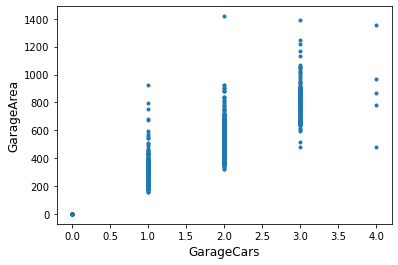

In [7]:
plot_corr(dataset, 'GarageCars', 'GarageArea')


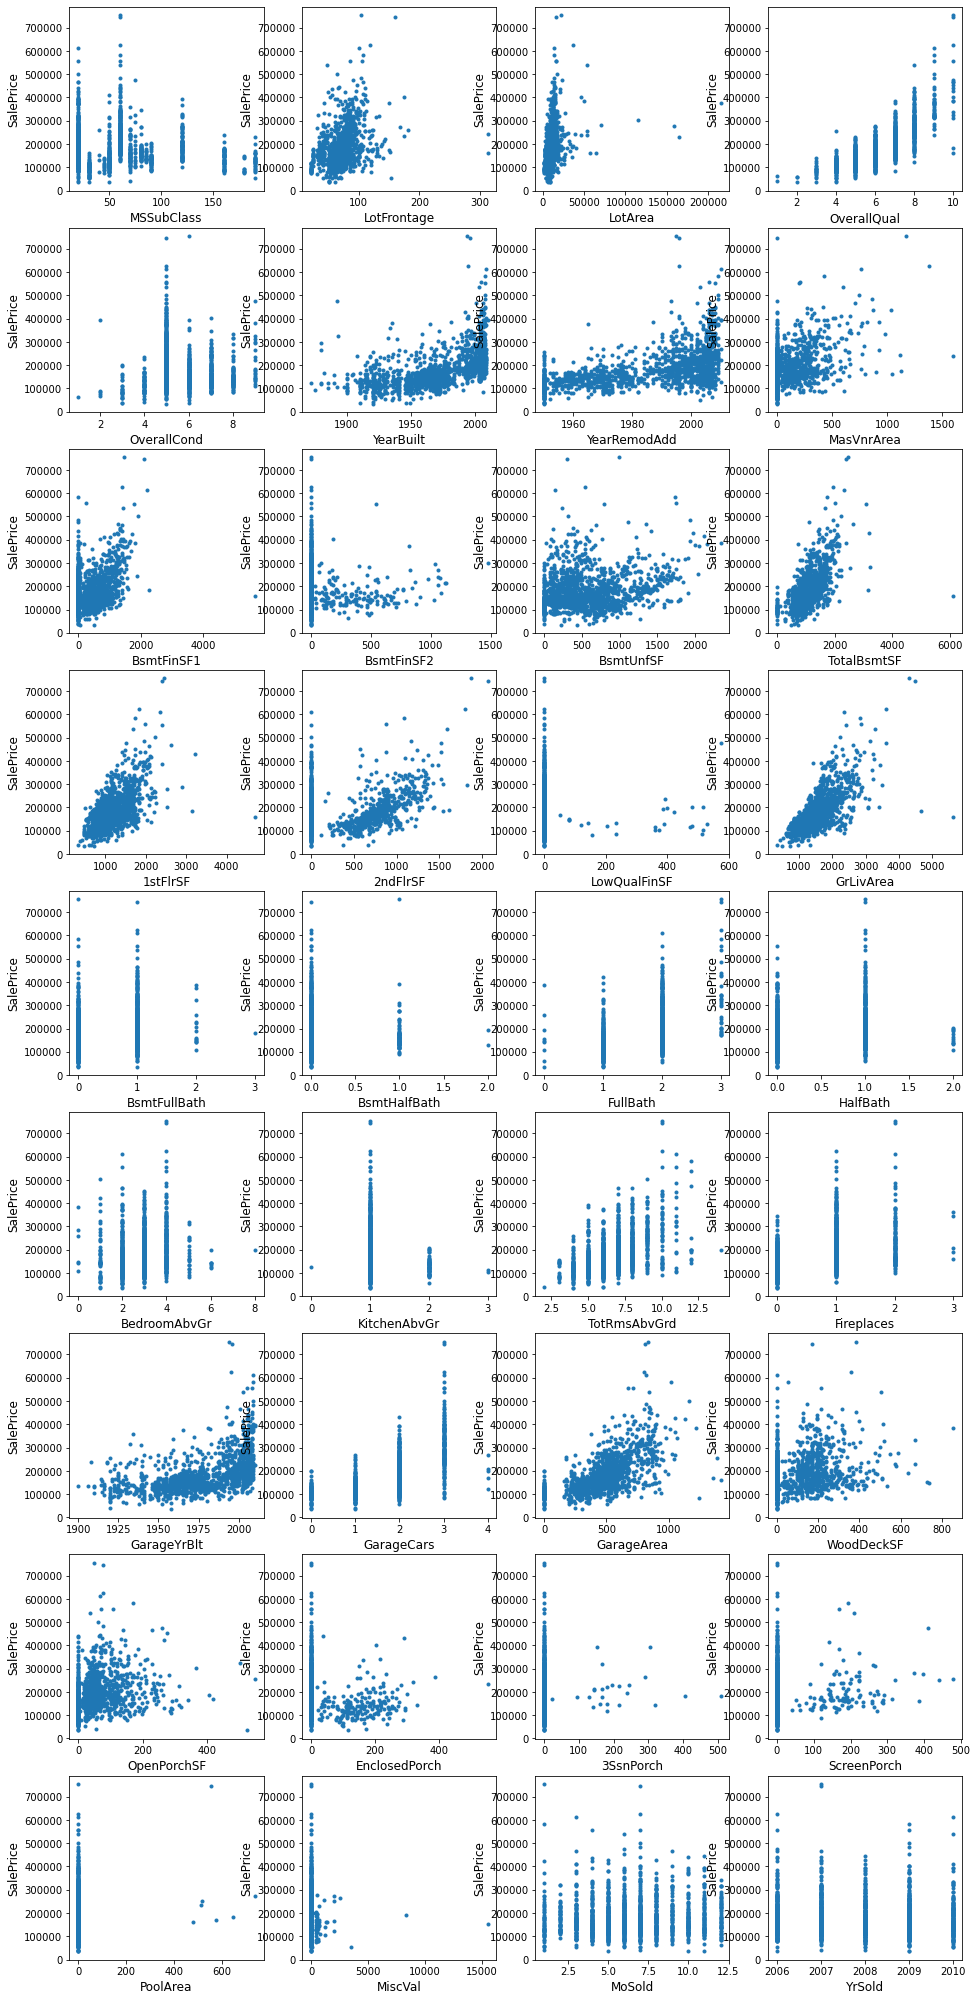

In [8]:
num_cols = list(dataset.select_dtypes(exclude=['object']))
#num_cols.append('SalePrice')
plot_multiple(dataset, num_cols)

In [ ]:
def get_info_object(df):
    features_obj = list(df.select_dtypes(include=['object']).columns)
    print ("\nThe number of object features: %s" %(len(features_obj)))
    for feature in features_obj:
        unique_ = df[feature].unique()
        print ("%50s has %8d null values (%7.2f%%)" %(feature, num_null, num_null/df_shape[0]*100))

In [9]:
def fill_missing(df):
    all_null = df.columns[df.isnull().any()]
    for col in all_null:
        try:
            df[col].fillna(df[col].mode()[0], inplace=True)
        except:
            df[col].fillna(df[col].median(), inplace=True)

In [10]:
fill_missing(dataset)

In [11]:
from sklearn.preprocessing import LabelEncoder

def Encode_object(df, Encode):
    if (Encode=='Drop'):
        res_df = df.select_dtypes(exclude=['object'])
    elif (Encode=='Label'):
        col_object = list(df.select_dtypes(include=['object']).columns)
        res_df = df.copy()
        # Apply label encoder to each column with categorical data
        label_encoder = LabelEncoder()
        for col in col_object:
            label_encoder.fit(df[col])
            res_df[col] = label_encoder.transform(df[col])
    return res_df

In [12]:
dataset = Encode_object(df=dataset, Encode='Label')

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   Alley          1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [14]:
from sklearn.model_selection import train_test_split

def split_train_validation_test(df, train_size, validation_size, test_size):
    train_validation, test = train_test_split(df, test_size=test_size)
    train, validation = train_test_split(train_validation, test_size=validation_size/(validation_size+train_size))
    return train, validation, test

In [15]:
train, validation, test = split_train_validation_test(df=dataset, train_size=0.6, validation_size=0.2, test_size=0.2)

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

def RFR_(train, validation, test, target_feature):
    """
    Comments here
    """    
    y_train = train[target_feature]
    X_train = train.drop(target_feature, axis=1)
    y_validation = validation[target_feature]
    X_validation = validation.drop(target_feature, axis=1)
    y_test = test[target_feature]
    X_test = test.drop(target_feature, axis=1)
    
    rfr = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
    rfr.fit(X_train, y_train)
    
    y_train_rfr = rfr.predict(X_train)
    rmse_train = mean_squared_error(y_train, y_train_rfr, squared=False)
    
    y_validation_rfr = rfr.predict(X_validation)
    rmse_validation = mean_squared_error(y_validation, y_validation_rfr, squared=False)
    
    y_test_rfr = rfr.predict(X_test)
    rmse_test = mean_squared_error(y_test, y_test_rfr, squared=False)
    
    print ("RMSE for train %15.2f, validation %15.2f, test sets %15.2f" %(rmse_train, rmse_validation, rmse_test))

In [17]:
RFR_(train, validation, test, target_feature='SalePrice')

RMSE for train        13028.95, validation        26940.44, test sets        28217.65


In [18]:
from sklearn.model_selection import GridSearchCV

def GridSearchCV_RFR_(train, validation, test, target_feature):
    """
    Comments here
    """    
    y_train = train[target_feature]
    X_train = train.drop(target_feature, axis=1)
    y_validation = validation[target_feature]
    X_validation = validation.drop(target_feature, axis=1)
    y_test = test[target_feature]
    X_test = test.drop(target_feature, axis=1)
    
    tuned_parameters = [{'max_depth': [3,5,7,9,11,13]},
                        {'n_estimators':[100,200,300]}]
    model = GridSearchCV(RandomForestRegressor(), param_grid= tuned_parameters, cv=4)
    model.fit(X_train, y_train)
    
    y_train_rfr = model.predict(X_train)
    rmse_train = mean_squared_error(y_train, y_train_rfr, squared=False)
    
    y_validation_rfr = model.predict(X_validation)
    rmse_validation = mean_squared_error(y_validation, y_validation_rfr, squared=False)
    
    y_test_rfr = model.predict(X_test)
    rmse_test = mean_squared_error(y_test, y_test_rfr, squared=False)
    
    print ("RMSE for train %15.2f, validation %15.2f, test sets %15.2f" %(rmse_train, rmse_validation, rmse_test))

In [19]:
GridSearchCV_RFR_(train, validation, test, target_feature='SalePrice')

RMSE for train        12122.92, validation        26686.12, test sets        27984.95


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

def GridSearchCV_Lasso_(train, validation, test, target_feature):
    """
    Comments here
    """    
    y_train = train[target_feature]
    X_train = train.drop(target_feature, axis=1)
    y_validation = validation[target_feature]
    X_validation = validation.drop(target_feature, axis=1)
    y_test = test[target_feature]
    X_test = test.drop(target_feature, axis=1)
    
    tuned_parameters = [{'alpha': [1,0.1,0.01,0.001]}]
    model = GridSearchCV(Lasso(), param_grid= tuned_parameters, cv=4)
    model.fit(X_train, y_train)
    
    y_train_rfr = model.predict(X_train)
    rmse_train = mean_squared_error(y_train, y_train_rfr, squared=False)
    
    y_validation_rfr = model.predict(X_validation)
    rmse_validation = mean_squared_error(y_validation, y_validation_rfr, squared=False)
    
    y_test_rfr = model.predict(X_test)
    rmse_test = mean_squared_error(y_test, y_test_rfr, squared=False)
    
    print ("RMSE for train %15.2f, validation %15.2f, test sets %15.2f" %(rmse_train, rmse_validation, rmse_test))

In [21]:
GridSearchCV_Lasso_(train, validation, test, target_feature='SalePrice')

/home/huy/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33014758961.992493, tolerance: 419397004.76062495
  model = cd_fast.enet_coordinate_descent(
/home/huy/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32914808158.038574, tolerance: 419397004.76062495
  model = cd_fast.enet_coordinate_descent(


RMSE for train        31810.89, validation        31551.29, test sets        28374.70


/home/huy/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32904789510.12549, tolerance: 419397004.76062495
  model = cd_fast.enet_coordinate_descent(
/home/huy/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32903780045.827454, tolerance: 419397004.76062495
  model = cd_fast.enet_coordinate_descent(


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor

def GridSearchCV_Ada_(train, validation, test, target_feature):
    """
    Comments here
    """    
    y_train = train[target_feature]
    X_train = train.drop(target_feature, axis=1)
    y_validation = validation[target_feature]
    X_validation = validation.drop(target_feature, axis=1)
    y_test = test[target_feature]
    X_test = test.drop(target_feature, axis=1)
    
    tuned_parameters = [{'learning_rate': [0.1,0.01,0.001]},
                        {'n_estimators':[50,100,200]}]
    model = GridSearchCV(AdaBoostRegressor(), param_grid= tuned_parameters, cv=4)
    model.fit(X_train, y_train)
    
    y_train_rfr = model.predict(X_train)
    rmse_train = mean_squared_error(y_train, y_train_rfr, squared=False)
    
    y_validation_rfr = model.predict(X_validation)
    rmse_validation = mean_squared_error(y_validation, y_validation_rfr, squared=False)
    
    y_test_rfr = model.predict(X_test)
    rmse_test = mean_squared_error(y_test, y_test_rfr, squared=False)
    
    print ("RMSE for train %15.2f, validation %15.2f, test sets %15.2f" %(rmse_train, rmse_validation, rmse_test))

In [23]:
GridSearchCV_Ada_(train, validation, test, target_feature='SalePrice')

RMSE for train        27168.83, validation        31433.53, test sets        33040.35
